# Exploration of Car Make and Violation Description Data from The City of Los Angeles Parking Citation Open Dataset Using Compositional Analysis

Building upon [previous explorations](https://github.com/hackforla/lucky-parking/tree/citation-analysis/notebooks/exploratory) of the [Los Angeles Parking Citation open dataset](https://data.lacity.org/A-Well-Run-City/Parking-Citations/wjz9-h9np), this project seeks to look for relationships between car makes and parking violations. 

Sometimes due to the lack of data or due to the nature of the system, using raw counts are not very useful. In the case of parking citations, it was found that most citations went to Toyota cars and trucks within the City of Los Angeles. Although this is interesting information in of itself it is hard to know if it is significant compared to other car makes without other information, like number of active 

Instead of looking at raw counts, if the data is grouped by car make and each type of violation is summed and divided by the total number of citations per car make, the dataset is then composed of ratios of specific violations for each car make. If the behavior of people who drive different car makes were entirely the same, there would be no differences in these ratios between car makes. that are restricted between 0 and 1 and sum up to 1. Traditional data analysis techniques, especially correlational analysis, done on fractions / ratios have been [warned against since 1897](https://royalsocietypublishing.org/doi/10.1098/rspl.1896.0076) by Karl Pearson himself, one of the founders of modern statistics. It is easy to see how this is the case because the fractions have to sum up to a constant--if one fraction goes up, the rest of the fractions in total have to go down, creating [spuirous correlations](https://en.wikipedia.org/wiki/Spurious_correlation_of_ratios) that would be mistaken for real correlations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from pathlib import Path
import random
import seaborn as sns
from pyrolite.plot import pyroplot

# Load project directory
PROJECT_DIR = Path(os.path.abspath('..'))

In [152]:
# Load already cleaned data from makefile command

# Only make and violation_description columns
df = pd.read_csv(PROJECT_DIR / 'data' / 'processed' / '2021-01-24_processed_02samp.csv', index_col=0)
df.head()

,make,violation_description,datetime
index,,,
0,Peterbuilt,NO STOPPING/STANDING,2015-12-15 08:25:00
1,Nissan,NO EVIDENCE OF REG,2015-09-16 21:20:00
2,Nissan,NO EVIDENCE OF REG,2015-12-18 19:20:00
3,Ford,DSPLYPLATE A,2015-12-22 01:50:00
4,Honda,RED ZONE,2015-12-21 10:41:00


In [170]:
# Examine missing data
df.isna().sum()/len(df)

make                     0.0
violation_description    0.0
datetime                 0.0
dtype: float64

The fraction of missing data is relatively small so we will drop it for now.

In [171]:
# Drop all missing data
df.dropna(inplace=True)

In [172]:
df.make.value_counts()[:10]/len(df)

Toyota           0.174188
Honda            0.113389
Ford             0.085954
Nissan           0.072509
Chevrolet        0.067995
BMW              0.046228
Mercedes Benz    0.041985
Volkswagen       0.033454
Hyundai          0.031204
Dodge            0.029741
Name: make, dtype: float64

In [158]:
df.violation_description.value_counts()[:10]/len(df)

NO PARK/STREET CLEAN      0.287573
METER EXP.                0.176231
RED ZONE                  0.082114
PREFERENTIAL PARKING      0.071856
DISPLAY OF TABS           0.057870
NO PARKING                0.043836
STOP/STAND PROHIBIT       0.038387
PARKED OVER TIME LIMIT    0.031890
DISPLAY OF PLATES         0.028263
WHITE ZONE                0.020985
Name: violation_description, dtype: float64

In [201]:
print(npsc_redzone.index)
print(comm_list)

Index(['Toyota', 'Honda', 'Ford', 'Nissan', 'Chevrolet', 'BMW',
       'Mercedes Benz', 'Volkswagen', 'Hyundai', 'Lexus', 'Dodge', 'Kia',
       'Jeep', 'Audi', 'Mazda', 'GMC', 'Infinity', 'Subaru', 'Chrysler',
       'Acura', 'Volvo', 'Land Rover', 'Mitsubishi', 'Cadillac', 'Mini',
       'Porsche', 'Buick', 'Grumman', 'Lincoln', 'Pontiac', 'Fiat', 'Saturn',
       'Tesla', 'Jaguar', 'Freightliner', 'Mercury', 'Isuzu', 'Suzuki', 'Saab',
       'Oldsmobile', 'Maserati', 'International', 'Smart', 'Harley-Davidson',
       'Plymouth', 'Yamaha', 'Bentley', 'Hummer', 'Alfa Romero', 'Kawasaki',
       'Hino', 'Geo Metro', 'Peterbuilt', 'Triumph', 'Rolls-Royce', 'Kenworth',
       'Checker', 'Ferrari', 'Scion', 'Sterling', 'Datsun', 'Aston Martin',
       'Daewoo'],
      dtype='object')
['Freightliner', 'Grumman', 'Isuzu', 'International', 'Peterbuilt', 'Kenworth', 'Hino']


In [200]:
# Show table of violation ratios
make_ratio.sort_values(by='RED ZONE', ascending=False).style.background_gradient(cmap='Blues').format("{:.3f}")

In [176]:
# Create table of violation ratio by make
def count_table(df, n=50):
  make_vio_dict = {}
  for make in df.make.value_counts().head(n).index:
    counts = df.loc[(df.make == make), 'violation_description'].value_counts()
    make_vio_dict[make] = counts.to_dict()
  dg = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)
  # Lets drop unknown and other car makes
  dg.drop(index=['Other', 'Unknown'], inplace=True)
  return dg

In [177]:
make_count = count_table(df, 65)

In [198]:
# Show table of violation ratios
make_count.head(60).style.background_gradient(cmap='Blues').format("{:.3f}")

In [165]:
def map_3(violation):
    if violation not in ['NO PARK/STREET CLEAN', 'METER EXP.']:
        return 'OTHER'
    else:
        return violation


In [166]:
# Create table of violation ratio by make
def count3_table(df, n=50):
  make_vio_dict = {}
  for make in df.make.value_counts().head(n).index:
    counts = df.loc[(df.make == make), 'violation_description'].apply(map_3).value_counts()
    make_vio_dict[make] = counts.to_dict()
  dg = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)
  # Lets drop unknown and other car makes
  dg.drop(index=['Other', 'Unknown'], inplace=True)
  return dg

In [167]:
dgg = count3_table(df, 65)

In [185]:
# Show table of violation ratios
dgg.head(50).style.background_gradient(cmap='Blues').format("{:.3f}")

,OTHER,NO PARK/STREET CLEAN,METER EXP.
Toyota,215418.000,133616.000,73113.000
Honda,142183.000,88802.000,43814.000
Ford,116180.000,61510.000,30620.000
Nissan,95034.000,53131.000,27560.000
Chevrolet,92972.000,47600.000,24215.000
BMW,58584.000,27117.000,26332.000
Mercedes Benz,53612.000,23549.000,24591.000
Volkswagen,39102.000,26248.000,15726.000
Hyundai,37628.000,23410.000,14584.000
Dodge,41526.000,20132.000,10419.000


In [168]:
girls = ['sugar', 'spice', 'everything_nice']

girl_ratios = np.random.randint(10,size=(50,3))
dg = pd.DataFrame(girl_ratios, columns=girls)

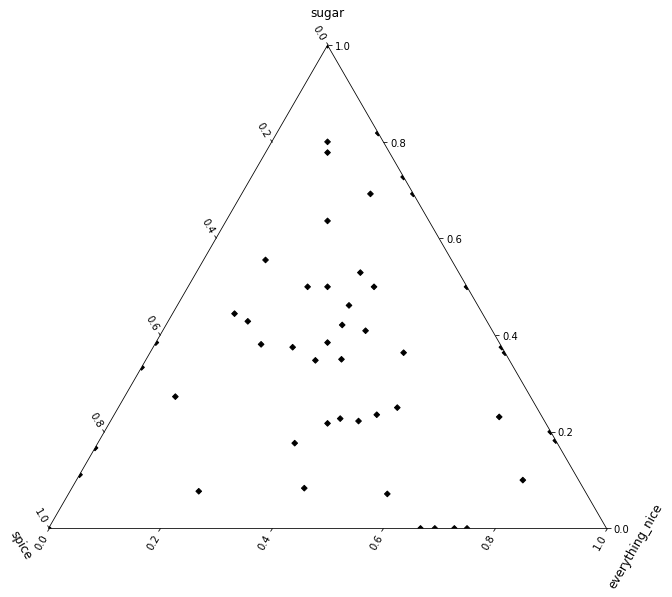

In [169]:
ax = dg.loc[:, girls].pyroplot.scatter(c="k", figsize=(10,10))
plt.show()

In [139]:
npsc_redzone.index

Index(['Toyota', 'Honda', 'Ford', 'Nissan', 'Chevrolet', 'BMW',
       'Mercedes Benz', 'Volkswagen', 'Hyundai', 'Lexus', 'Dodge', 'Kia',
       'Jeep', 'Audi', 'Mazda', 'GMC', 'Infinity', 'Subaru', 'Chrysler',
       'Acura', 'Volvo', 'Land Rover', 'Mitsubishi', 'Mini', 'Cadillac',
       'Porsche', 'Buick', 'Grumman', 'Lincoln', 'Tesla', 'Saturn', 'Fiat',
       'Pontiac', 'Jaguar', 'Freightliner', 'Mercury', 'Isuzu', 'Suzuki',
       'Saab', 'Oldsmobile', 'Maserati', 'International', 'Smart', 'Plymouth',
       'Harley-Davidson', 'Bentley', 'Yamaha', 'Alfa Romero', 'Kawasaki',
       'Hummer', 'Hino', 'Geo Metro', 'Peterbuilt', 'Triumph', 'Rolls-Royce',
       'Checker', 'Kenworth', 'Ferrari', 'Datsun', 'Scion', 'Aston Martin',
       'Daewoo', 'Sterling', 'Winnebago', 'Lamborghini', 'MERK', 'IND',
       'Mack'],
      dtype='object')

In [202]:
luxury_list = ['Tesla','Infinity','Jaguar','BMW','Mercedes Benz','Lexus','Audi','Acura','Porsche','Bentley','Alfa Romero','Rolls-Royce','Ferrari','Land Rover', 'Maserati', 'Aston Martin', 'Lamborghini']
comm_list = ['Freightliner','Grumman','Isuzu','International','Peterbuilt','Kenworth','Hino','Sterling']
def make_cat(df):
    if df.name in luxury_list:
        return 0
    elif df.name in comm_list:
        return 1
    else:
        return 2

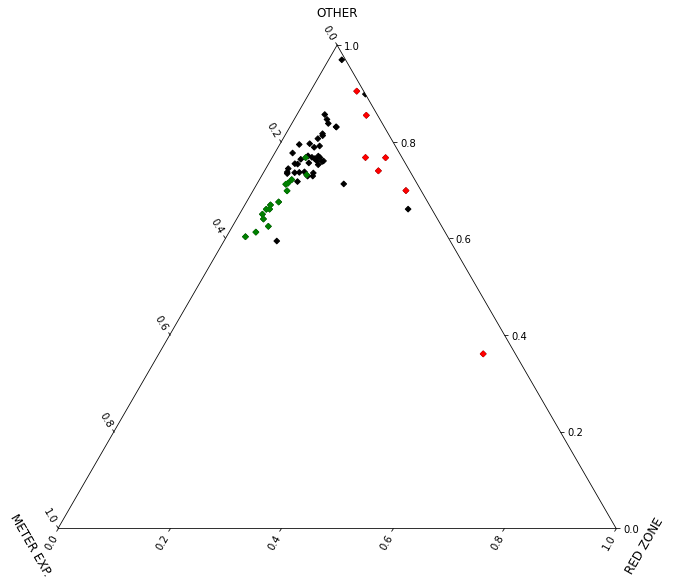

In [116]:
def map_4(violation):
    if violation not in ['METER EXP.', 'RED ZONE']:
        return 'OTHER'
    else:
        return violation
# Create table of violation ratio by make
def count4_table(df, n=50):
  make_vio_dict = {}
  for make in df.make.value_counts().head(n).index:
    counts = df.loc[(df.make == make), 'violation_description'].apply(map_4).value_counts()
    make_vio_dict[make] = counts.to_dict()
  dg = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)
  # Lets drop unknown and other car makes
  dg.drop(index=['Other', 'Unknown'], inplace=True)
  return dg
npsc_redzone = count4_table(df, 65)
ax = npsc_redzone.pyroplot.scatter(c="k", figsize=(10,10))
npsc_redzone.loc[luxury_list, :].pyroplot.scatter(ax=ax, c='g',figsize=(10,10))
npsc_redzone.loc[comm_list, :].pyroplot.scatter(ax=ax, c='r',figsize=(10,10))
plt.show()

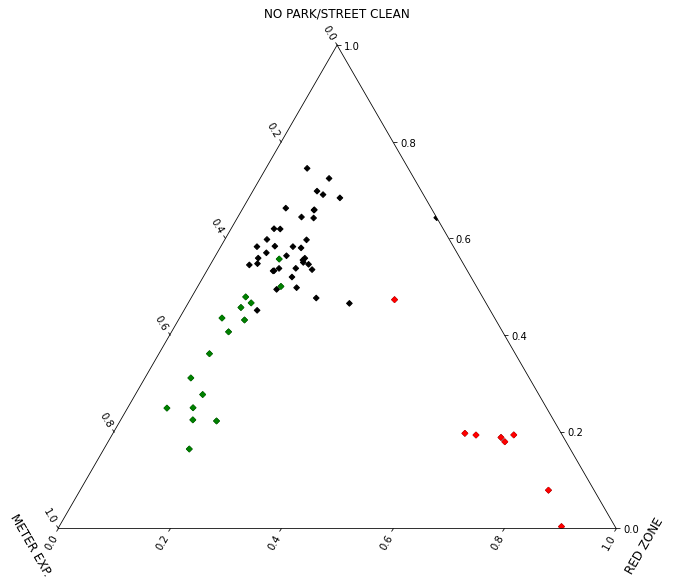

In [204]:
# def map_4(violation):
#     if violation not in ['NO PARK/STREET CLEAN', 'DISPLAY OF PLATES']:
#         return 'OTHER'
#     else:
#         return violation
# Create table of violation ratio by make
def count4_table(df, n=50):
    filtered_df = df.loc[df.violation_description.isin(['NO PARK/STREET CLEAN', 'RED ZONE', 'METER EXP.'])]
    make_vio_dict = {}
    for make in filtered_df.make.value_counts().head(n).index:
    # counts = df.loc[(df.make == make), 'violation_description'].apply(map_4).value_counts()
        counts = filtered_df.loc[(df.make == make), 'violation_description'].value_counts()
        make_vio_dict[make] = counts.to_dict()
        dg = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)
  # Lets drop unknown and other car makes
    dg.drop(index=['Other', 'Unknown'], inplace=True)
    return dg
npsc_redzone = count4_table(df, 65)
ax = npsc_redzone.pyroplot.scatter(c="k", figsize=(10,10))

npsc_redzone.loc[set(luxury_list).intersection(npsc_redzone.index), :].pyroplot.scatter(ax=ax, c='g',figsize=(10,10))
npsc_redzone.loc[set(comm_list).intersection(npsc_redzone.index), :].pyroplot.scatter(ax=ax, c='r',figsize=(10,10))

plt.show()

In [188]:
print(npsc_redzone.index)
print(comm_list)

Index(['Toyota', 'Honda', 'Ford', 'Nissan', 'Chevrolet', 'BMW',
       'Mercedes Benz', 'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia',
       'Jeep', 'Audi', 'Mazda', 'GMC', 'Infinity', 'Chrysler', 'Acura',
       'Subaru', 'Volvo', 'Land Rover', 'Mitsubishi', 'Cadillac', 'Mini',
       'Porsche', 'Buick', 'Freightliner', 'Lincoln', 'Pontiac', 'Tesla',
       'Saturn', 'Grumman', 'Fiat', 'Jaguar', 'Mercury', 'Isuzu',
       'International', 'Suzuki', 'Saab', 'Oldsmobile', 'Maserati',
       'Peterbuilt', 'Smart', 'Kenworth', 'Plymouth', 'Harley-Davidson',
       'Hino', 'Bentley', 'Alfa Romero', 'Hummer', 'Yamaha', 'Kawasaki',
       'Geo Metro', 'Winnebago', 'Rolls-Royce', 'Triumph', 'Checker', 'Scion',
       'Ferrari', 'Sterling', 'Datsun', 'Lamborghini'],
      dtype='object')
['Freightliner', 'Grumman', 'Isuzu', 'International', 'Peterbuilt', 'Kenworth', 'Hino']


In [191]:
npsc_redzone.sort_values(by='RED ZONE', ascending=False)[:10]

,OTHER,NO PARK/STREET CLEAN,RED ZONE
Toyota,258391,133616,30140
Honda,166294,88802,19703
Ford,128896,61510,17904
Nissan,106740,53131,15854
Chevrolet,101875,47600,15312
Dodge,44899,20132,7046
Mercedes Benz,71731,23549,6472
BMW,79032,27117,5884
Hyundai,46686,23410,5526
Grumman,3945,22,5465


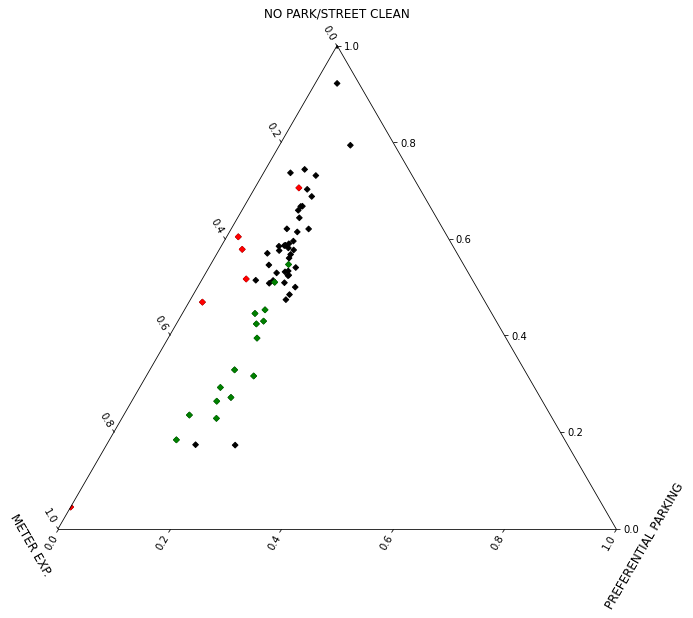

In [151]:
def count4_table(df, n=50):
    filtered_df = df.loc[df.violation_description.isin(['NO PARK/STREET CLEAN', 'PREFERENTIAL PARKING', 'METER EXP.'])]
    make_vio_dict = {}
    for make in filtered_df.make.value_counts().head(n).index:
    # counts = df.loc[(df.make == make), 'violation_description'].apply(map_4).value_counts()
        counts = filtered_df.loc[(df.make == make), 'violation_description'].value_counts()
        make_vio_dict[make] = counts.to_dict()
        dg = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)
  # Lets drop unknown and other car makes
    dg.drop(index=['Other', 'Unknown'], inplace=True)
    return dg
npsc_redzone = count4_table(df, 65)
ax = npsc_redzone.pyroplot.scatter(c="k", figsize=(10,10))

npsc_redzone.loc[set(luxury_list).intersection(npsc_redzone.index), :].pyroplot.scatter(ax=ax, c='g',figsize=(10,10))
npsc_redzone.loc[set(comm_list).intersection(npsc_redzone.index), :].pyroplot.scatter(ax=ax, c='r',figsize=(10,10))

plt.show()

In [149]:
df.loc[df.violation_description.isin(['NO PARK/STREET CLEAN', 'PREFERENTIAL PARKING', 'METER EXP.']), 'violation_description'].value_counts()

NO PARK/STREET CLEAN    346212
METER EXP.              213006
PREFERENTIAL PARKING     86647
Name: violation_description, dtype: int64